##### Copyright 2021 The Cirq Developers

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Calibrations
The [guide on calibration](../../google/calibration.md) gives an introduction to calibration metrics and how to retrieve them from the Google Quantum Computing Service (QCS). In this tutorial, we show how to visualize these calibration metrics via single qubit heatmaps, two qubit interaction heatmaps and integrated histograms.

**Disclaimer:** The calibration metrics of the quantum processor shown in the tutorial do not correspond to actual production metrics.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/google/visualizing_calibration_metrics"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/google/visualizing_calibration_metrics.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/visualizing_calibration_metrics.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/google/visualizing_calibration_metrics.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

## Setup
Note: this notebook relies on unreleased Cirq features. If you want to try these features, make sure you install cirq via `pip install cirq --pre`.

In [2]:
#@title Necessary Imports
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq --pre
    print("installed cirq.")
import cirq
import cirq_google
import os
import matplotlib.pyplot as plt

## Authenticate and install Cirq

For details of authentication and installation, please see [Get started with Quantum Computing Service](start.ipynb).

Note:  The below code will install the latest stable release of cirq.  If you need the latest and greatest features and don't mind if a few things aren't quite working correctly, you can install the pre-release version of `cirq` using `pip install --pre cirq` instead of `pip install cirq` to get the most up-to-date features of cirq.

1. Enter the Cloud project ID you'd like to use in the `YOUR_PROJECT_ID` field.
2. Then run the cell below (and go through the auth flow for access to the project id you entered).

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/run-code-block.png" alt="Quantum Engine console">

In [3]:
import cirq_google as cg

# The Google Cloud Project id to use.
project_id = "" #@param {type:"string"}
processor_id = "" #@param {type:"string"}

from cirq_google.engine.qcs_notebook import get_qcs_objects_for_notebook
device_sampler = get_qcs_objects_for_notebook(project_id, processor_id)

if not device_sampler.signed_in:
    raise Exception("Please setup project_id in this cell or set the `GOOGLE_CLOUD_PROJECT` env var to your project id.")

Notebook is not executed with Colab, assuming Application Default Credentials are setup.
Successful authentication to Google Cloud.


In [4]:
# @title Quantum Engine Configuration
# @markdown Replace the `PROCESSOR_ID` and `YOUR_PROJECT_ID` with your details.
PROCESSOR_ID = '' #@param {type: 'string'}
cals = cirq_google.get_engine_calibration(PROCESSOR_ID, YOUR_PROJECT_ID)

In [5]:
#@title View available calibration metrics
#@markdown See https://quantumai.google/cirq/google/calibration for a description of the available calibration metrics
for k, v in cals.items():
    print(k)

single_qubit_p00_error
single_qubit_p11_error
single_qubit_readout_separation_error
parallel_p00_error
parallel_p11_error
single_qubit_rb_average_error_per_gate
single_qubit_rb_incoherent_error_per_gate
single_qubit_rb_pauli_error_per_gate
single_qubit_idle_t1_micros
two_qubit_sycamore_gate_xeb_average_error_per_cycle
two_qubit_sycamore_gate_xeb_pauli_error_per_cycle
two_qubit_sycamore_gate_xeb_incoherent_error_per_cycle
two_qubit_sqrt_iswap_gate_xeb_average_error_per_cycle
two_qubit_sqrt_iswap_gate_xeb_pauli_error_per_cycle
two_qubit_sqrt_iswap_gate_xeb_incoherent_error_per_cycle
two_qubit_parallel_sycamore_gate_xeb_average_error_per_cycle
two_qubit_parallel_sycamore_gate_xeb_pauli_error_per_cycle
two_qubit_parallel_sycamore_gate_xeb_incoherent_error_per_cycle
two_qubit_parallel_sqrt_iswap_gate_xeb_average_error_per_cycle
two_qubit_parallel_sqrt_iswap_gate_xeb_pauli_error_per_cycle
two_qubit_parallel_sqrt_iswap_gate_xeb_incoherent_error_per_cycle


# Metrics

For a complete description of all the available calibration metrics, please see [Calibration metrics](../../google/calibration.md)

## Single Qubit Isolated Benchmarking

Single qubit gate error is estimated using randomized benchmarking. This error is calculated for one qubit at a time while all other qubits on the device are idle (isolated).

### Average Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

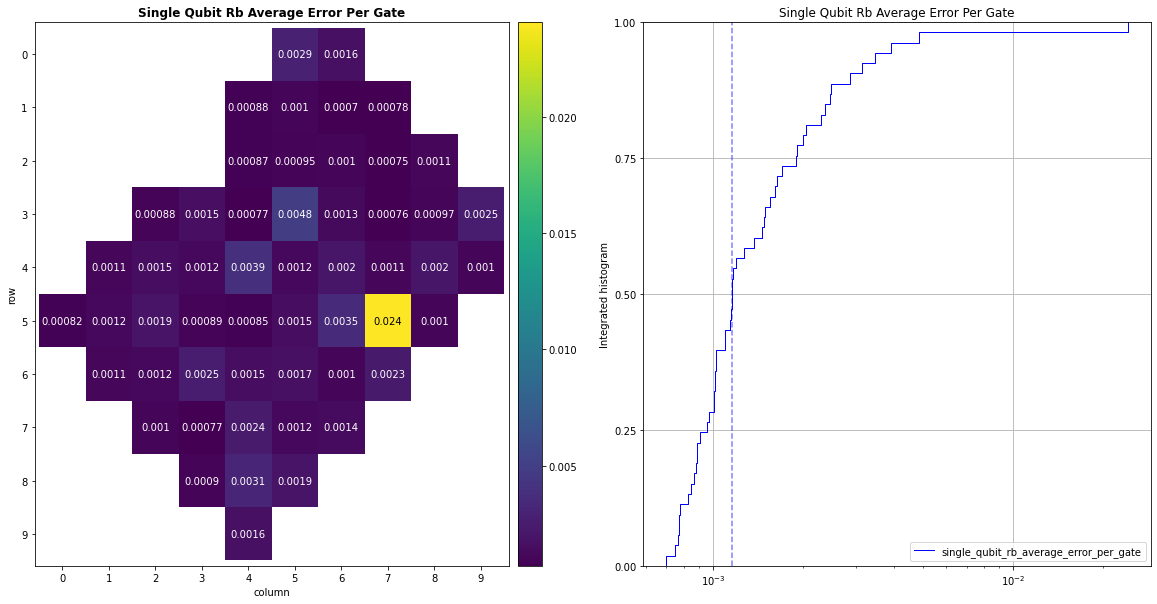

In [6]:
fig, _ = cals.plot('single_qubit_rb_average_error_per_gate', fig=plt.figure(figsize=(20, 10)))

### Incoherent Error 

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

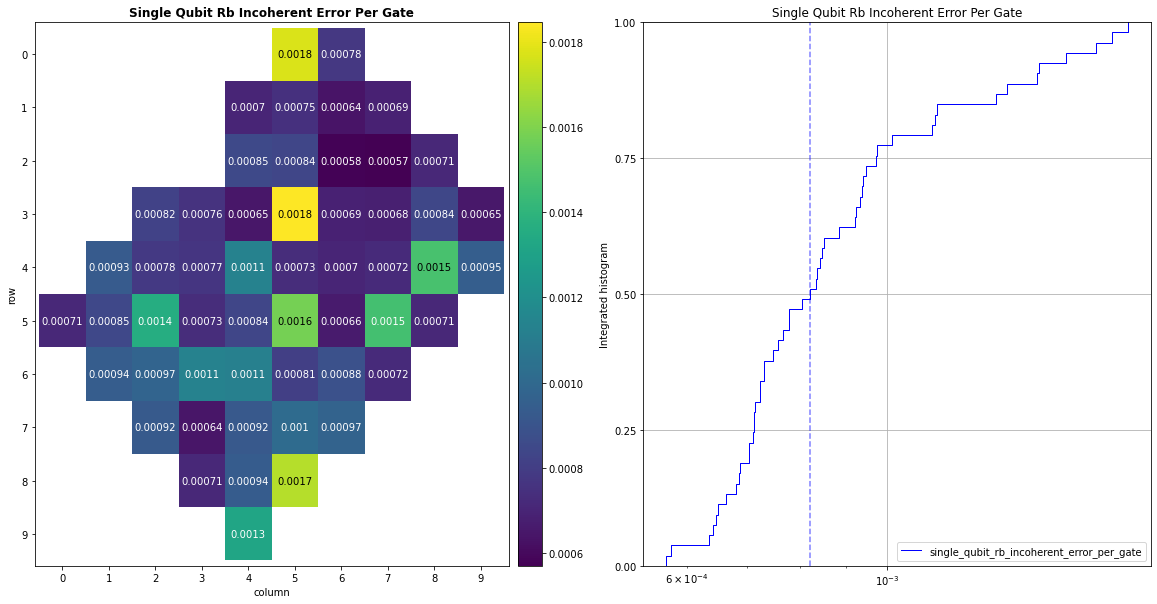

In [7]:
fig, _ = cals.plot('single_qubit_rb_incoherent_error_per_gate', fig=plt.figure(figsize=(20, 10)))


### Pauli Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

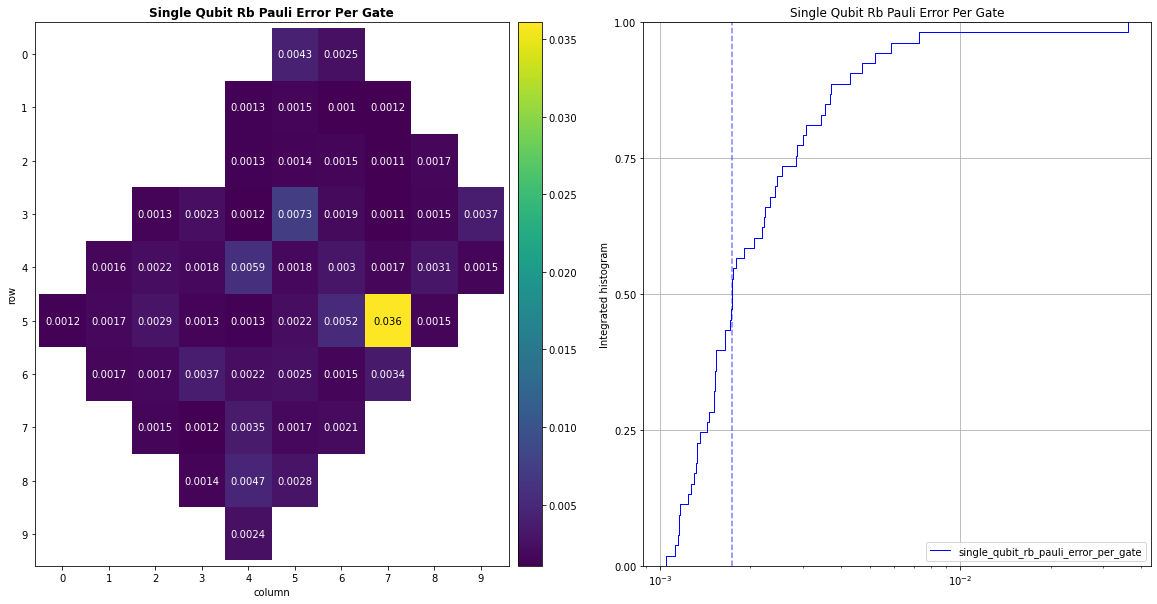

In [8]:
fig, _ = cals.plot('single_qubit_rb_pauli_error_per_gate', fig=plt.figure(figsize=(20, 10)))


### Comparison Histograms

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

Text(0.5, 1.0, 'Single Qubit Error Comparison Histograms')

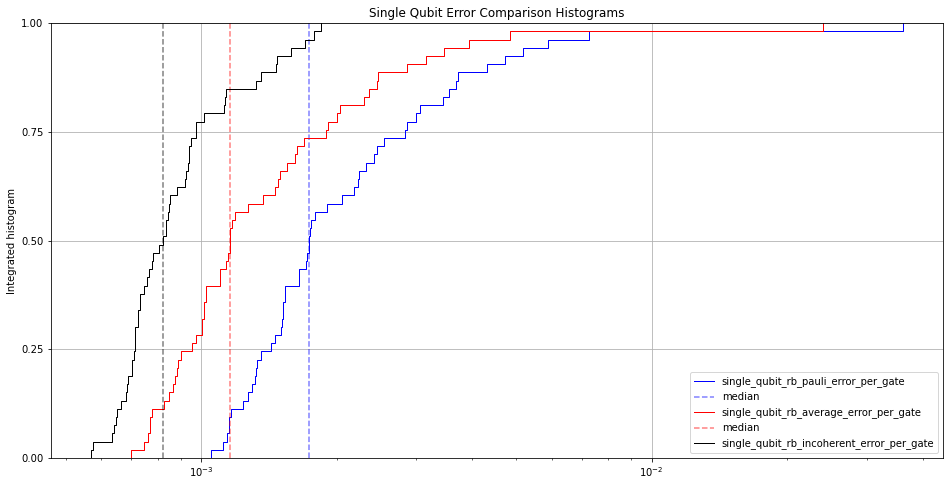

In [9]:
keys = ['single_qubit_rb_pauli_error_per_gate', 'single_qubit_rb_average_error_per_gate', 'single_qubit_rb_incoherent_error_per_gate']
fig, ax = plt.subplots(figsize=(16, 8))
cals.plot_histograms(keys, ax)
ax.set_title("Single Qubit Error Comparison Histograms")

## Single Qubit Isolated Readout

The isolated single qubit error is when the readout is measured in isolation (only one qubit is measured at a time).

### Zero State Errors

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

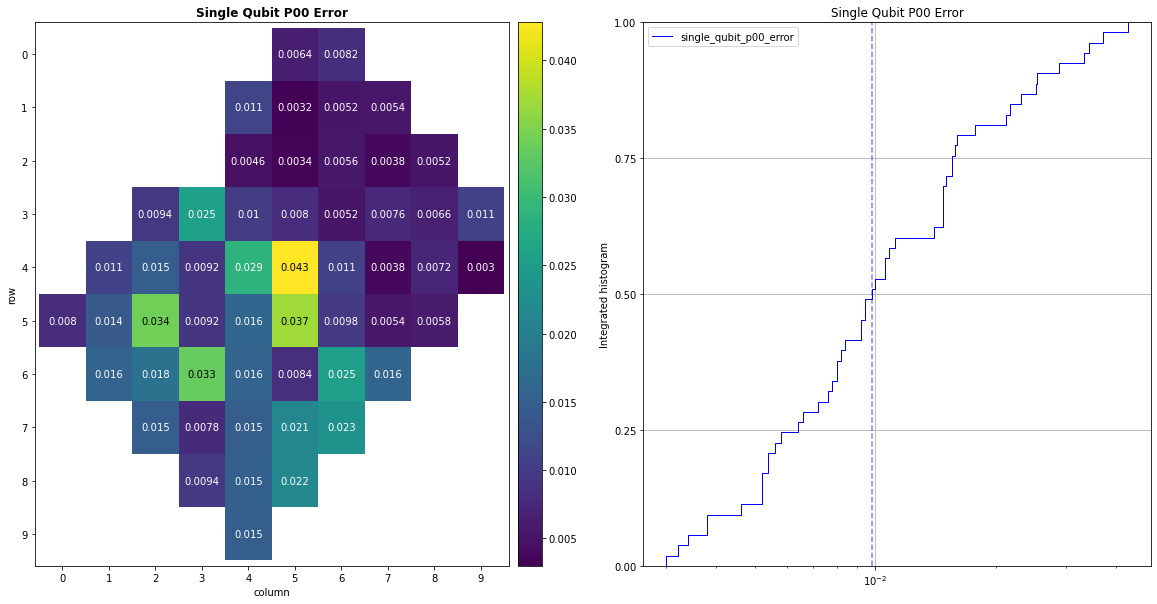

In [10]:
fig, _ = cals.plot('single_qubit_p00_error', fig=plt.figure(figsize=(20, 10)))

### One State Errors

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

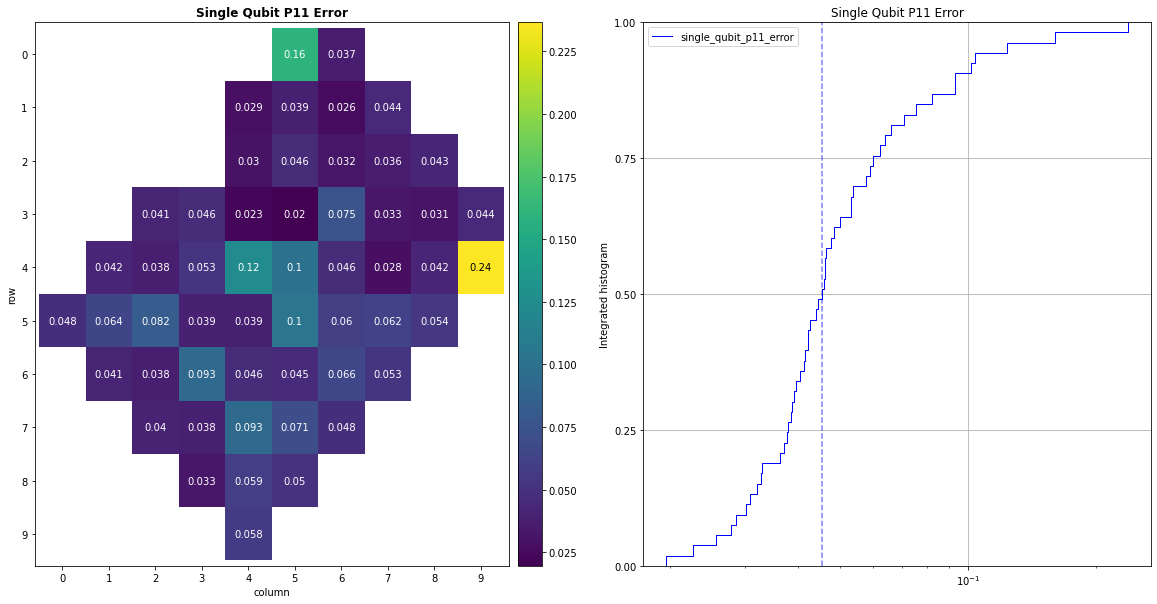

In [11]:
fig, _ = cals.plot('single_qubit_p11_error', fig=plt.figure(figsize=(20, 10)))

### Readout Separation Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

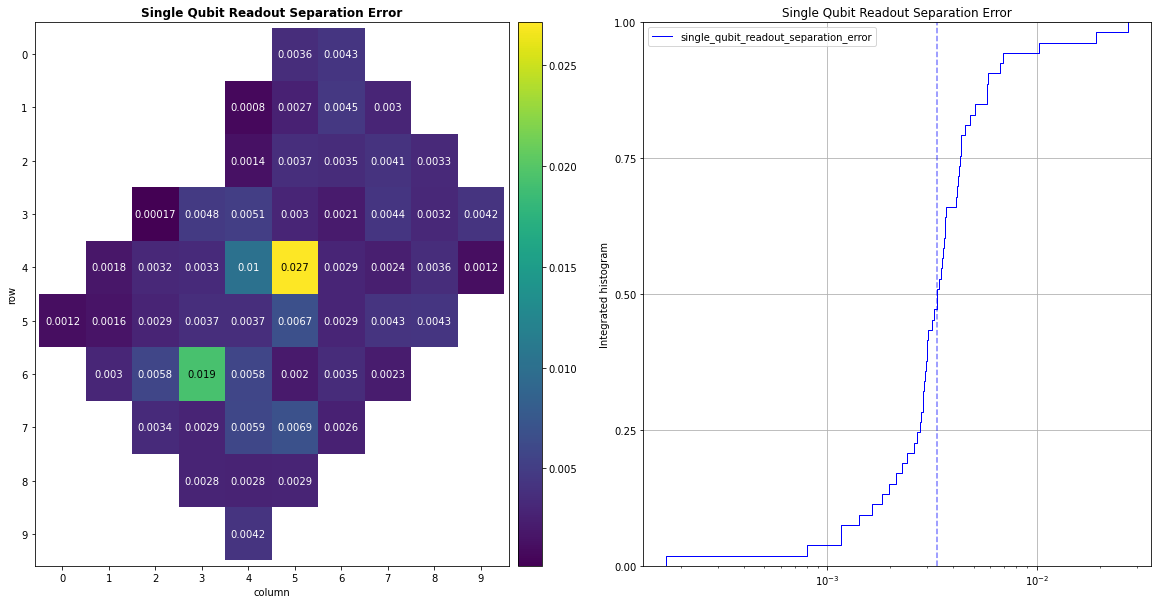

In [12]:
fig, _ = cals.plot('single_qubit_readout_separation_error', fig=plt.figure(figsize=(20, 10)))

## Parallel Readout Error

The parallel single qubit readout error is when the readout for all qubits is measured at the same time.

### Parallel P00 Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

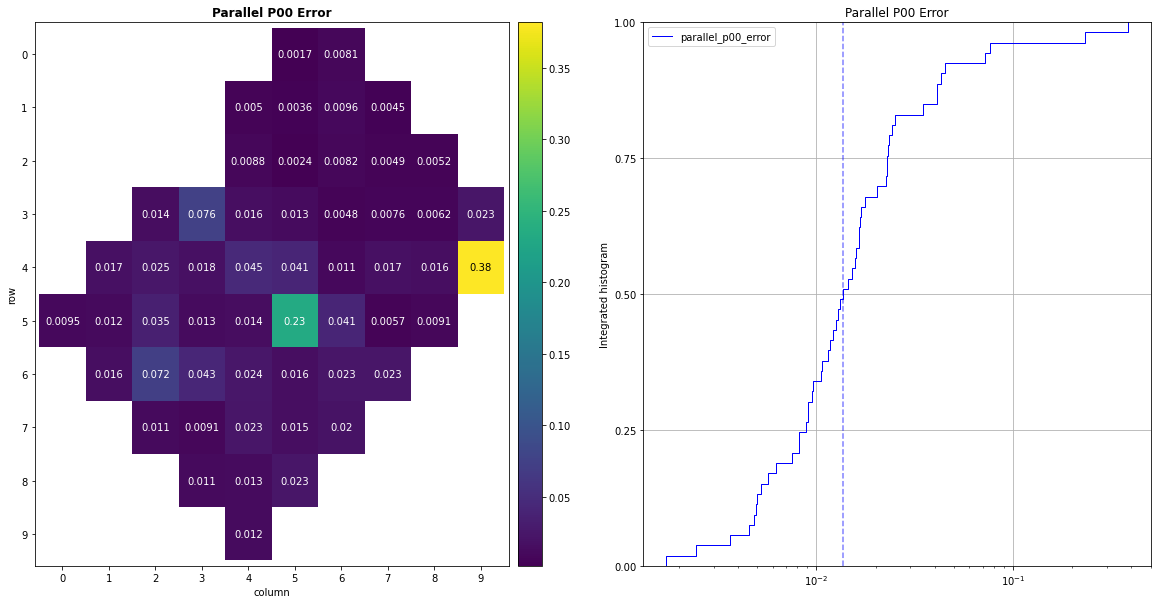

In [13]:
fig, _ = cals.plot('parallel_p00_error', fig=plt.figure(figsize=(20, 10)))

### Parallel P11 Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

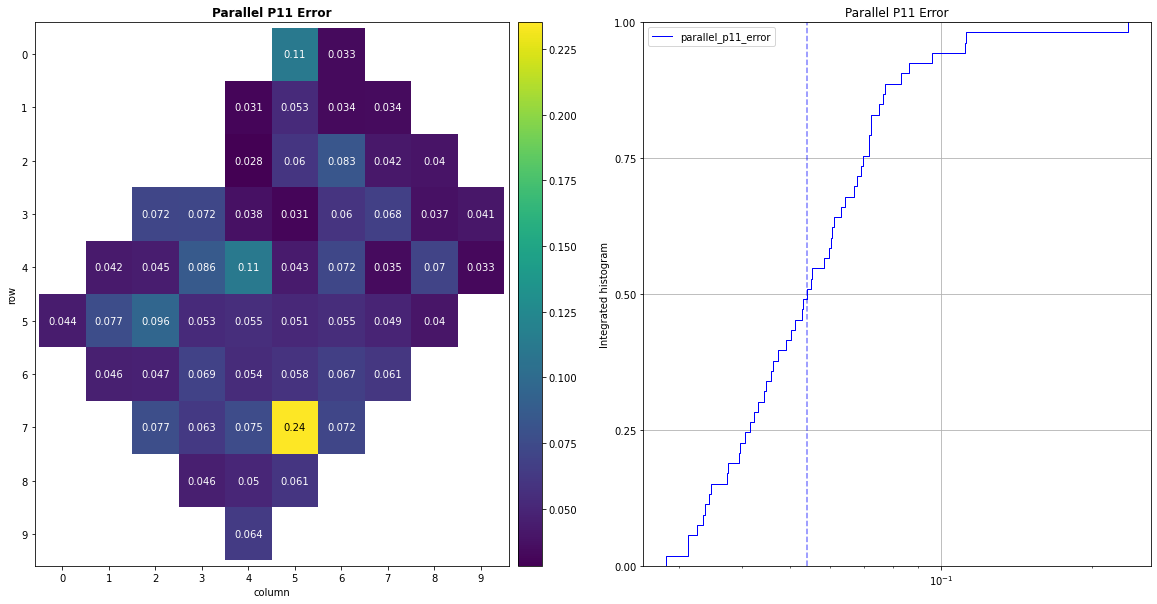

In [14]:
fig, _ = cals.plot('parallel_p11_error', fig=plt.figure(figsize=(20, 10)))

## Isolated Pair XEB, sqrt(iswap)

Two qubit error is primarily characterized by applying cross-entropy benchmarking (XEB).
These errors are isolated, meaning that, during the metric measurement, only the pair of qubits being considered is active. All other qubits are idle.

### Average Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

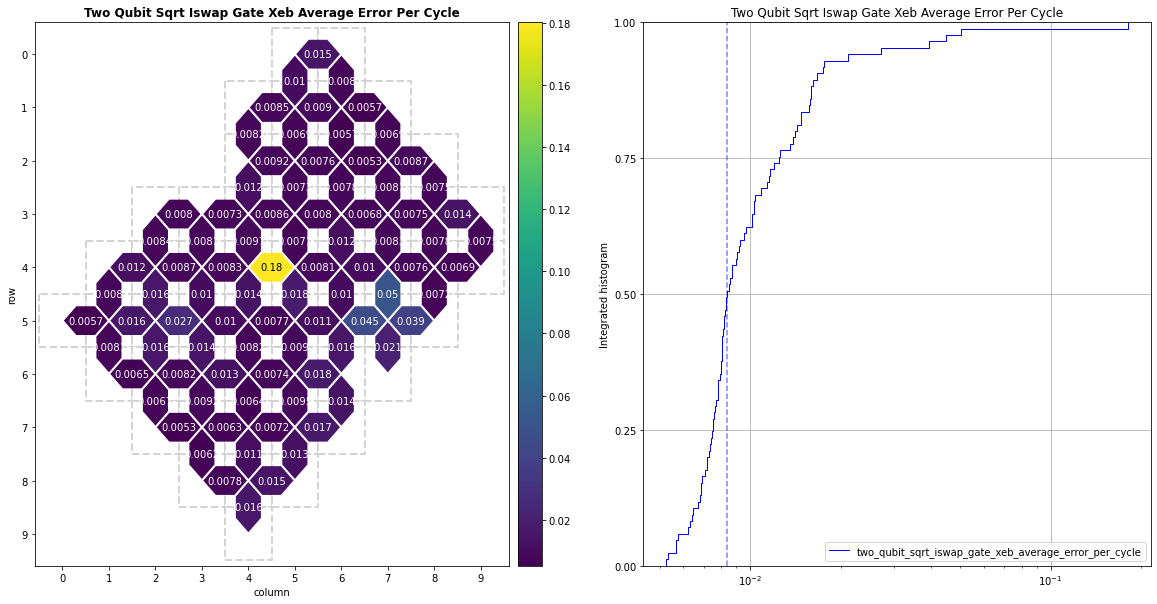

In [15]:
fig, _ = cals.plot('two_qubit_sqrt_iswap_gate_xeb_average_error_per_cycle', fig=plt.figure(figsize=(20, 10)))

### Incoherent Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

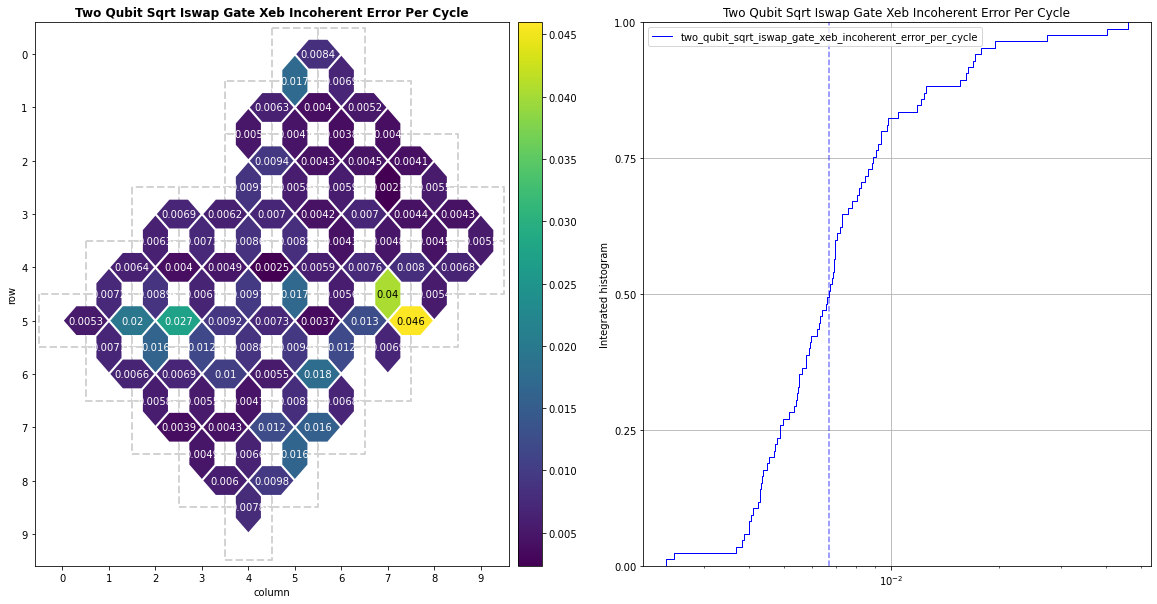

In [16]:
fig, _ = cals.plot('two_qubit_sqrt_iswap_gate_xeb_incoherent_error_per_cycle', fig=plt.figure(figsize=(20, 10)))

### Pauli Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

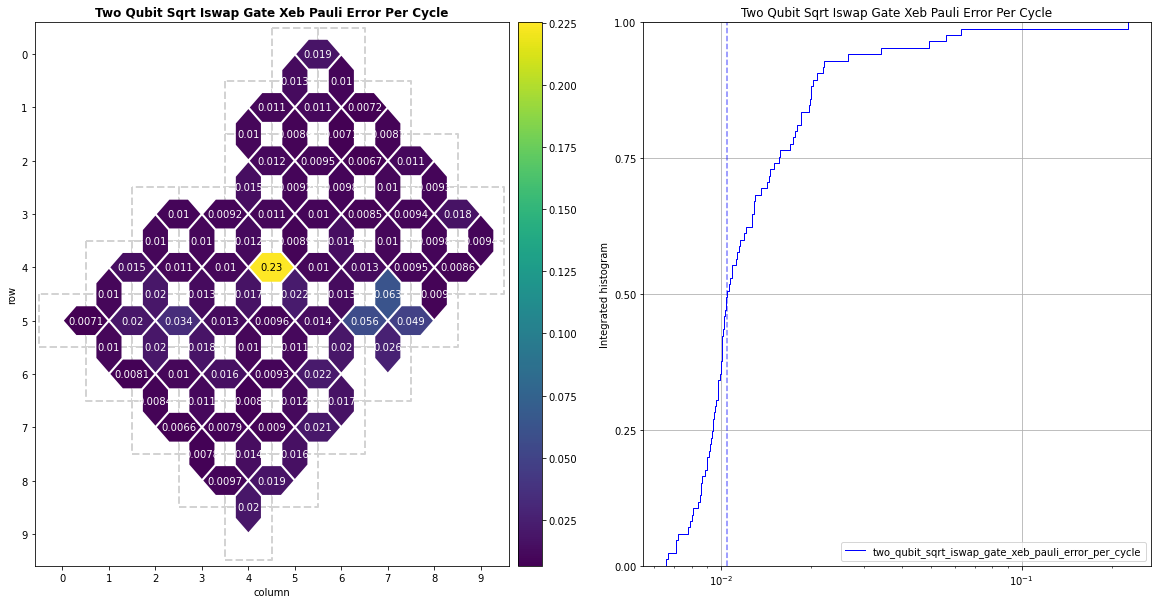

In [17]:
fig, _ = cals.plot('two_qubit_sqrt_iswap_gate_xeb_pauli_error_per_cycle', fig=plt.figure(figsize=(20, 10)))

## Parallel Pair XEB, sqrt(iswap)

These metrics are calculated the same way as the 2-qubit isolated XEB error metrics. However, this metric quantifies the error of multiple parallel 2-qubit cycles at a time.

### Average Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

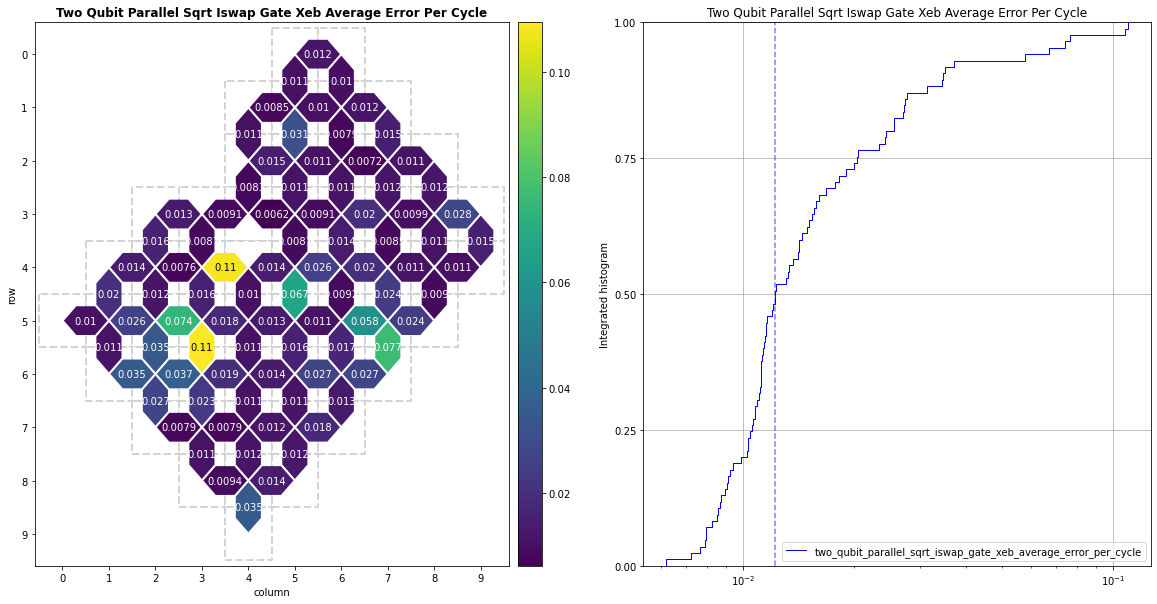

In [18]:
fig, _ = cals.plot('two_qubit_parallel_sqrt_iswap_gate_xeb_average_error_per_cycle', fig=plt.figure(figsize=(20, 10)))

### Incoherent Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

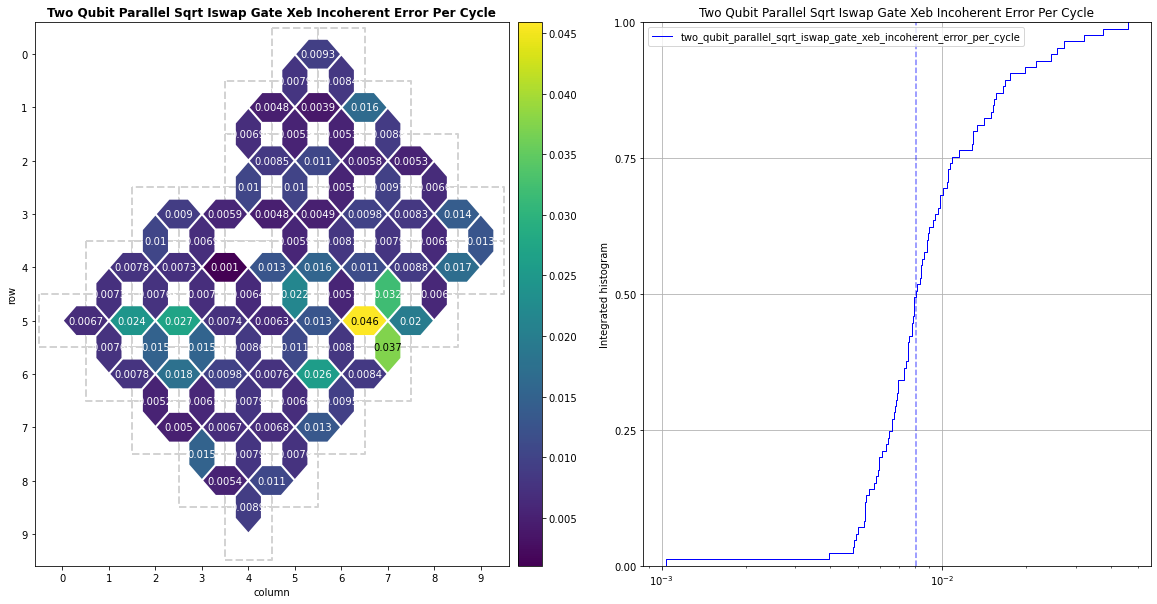

In [19]:
fig, _ = cals.plot('two_qubit_parallel_sqrt_iswap_gate_xeb_incoherent_error_per_cycle', fig=plt.figure(figsize=(20, 10)))

### Pauli Error

**Disclaimer:** The calibration metrics shown here do not correspond to actual production metrics.

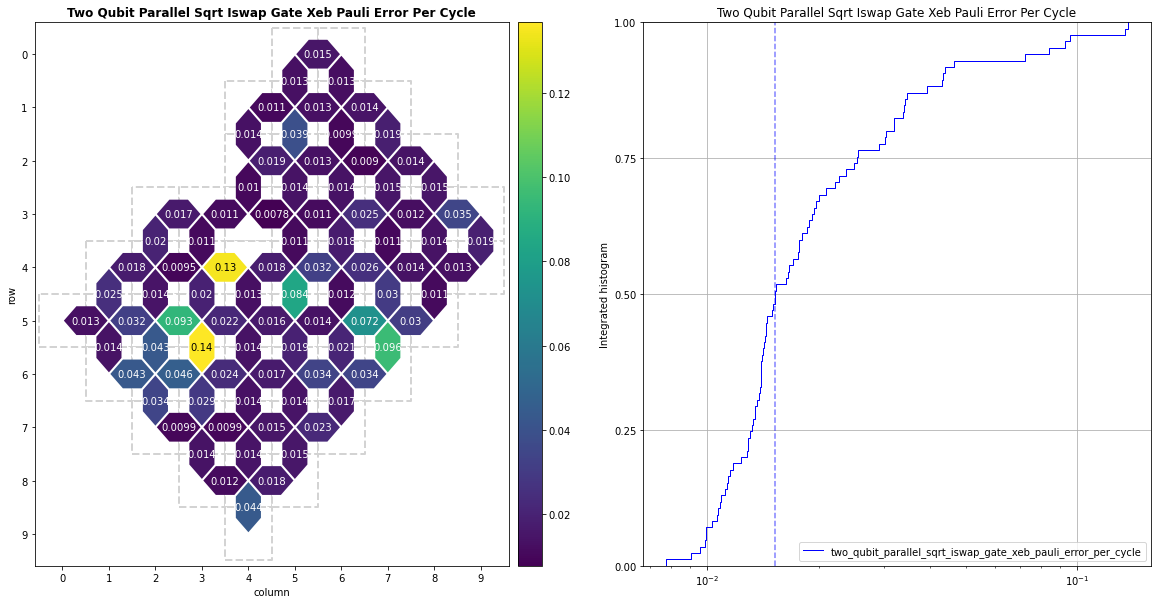

In [20]:
fig, _ = cals.plot('two_qubit_parallel_sqrt_iswap_gate_xeb_pauli_error_per_cycle', fig=plt.figure(figsize=(20, 10)))